In [7]:
import importlib
import os
import sys
sys.path.append("/cluster/u/rrastogi/ECNN/X-CAP/src/utils")

import evaluation_utils
importlib.reload(evaluation_utils)
from evaluation_utils import *

from sklearn.metrics import roc_curve,  
import lightgbm as lgb

DEFAULT_XCAP_CLF_PATH = "/cluster/u/rrastogi/ECNN/results/d_original/xcap/featurize_0520/clf.mdl"
BALANCED_XCAP_CLF_PATH = "balanced_clf.mdl"

In [8]:
default_xcap_clf = lgb.Booster(model_file=DEFAULT_XCAP_CLF_PATH)
balanced_xcap_clf = lgb.Booster(model_file=BALANCED_XCAP_CLF_PATH)

In [9]:
def create_title(metric):
    dataset = "$D_{original}$"
    return "{} ({})".format(metric, dataset)

def plotRoc(hsr=False):
    plt.figure(figsize=(6, 5), dpi=300)
        
    legend = []

    # Default XCAP
    xcap_features_path = "/cluster/u/rrastogi/ECNN/results/d_original/xcap/featurize_0520/total_test.features"
    xcap_labels, xcap_predictions = get_xcap_predictions(default_xcap_clf, xcap_features_path)
    xcap_fpr, xcap_tpr, _ = roc_curve(xcap_labels, xcap_predictions)
    xcap_auroc = auc(xcap_fpr, xcap_tpr) if not hsr else getHsrAuc(xcap_fpr, xcap_tpr)
    plt.plot(xcap_fpr, xcap_tpr)
    legend.append("X-CAP (trained on imbalanced data): {:0.3f}".format(round(xcap_auroc, 3)))

    # Modified XCAP
    mod_xcap_features_path = "features/test_with_balanced_ref.features"
    mod_xcap_labels, mod_xcap_preds = get_xcap_predictions(balanced_xcap_clf, xcap_features_path)
    mod_xcap_fpr, mod_xcap_tpr, _ = roc_curve(mod_xcap_labels, mod_xcap_preds)
    mod_xcap_auroc = auc(mod_xcap_fpr, mod_xcap_tpr) if not hsr else getHsrAuc(mod_xcap_fpr, mod_xcap_tpr)
    plt.plot(mod_xcap_fpr, mod_xcap_tpr, c='purple')
    legend.append("X-CAP (trained on balanced data): {:.3f}".format(round(mod_xcap_auroc, 3)))
    
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0] if not hsr else [0.95, 1.0])
    metric = "hsr-ROC" if hsr else "ROC"
    plt.title(create_title("hsr-ROC" if hsr else "ROC"))
    plt.legend(legend, loc="upper left" if hsr else "lower right")
    plt.show()

In [13]:
def plotPrc():
    plt.figure(figsize=(6, 5), dpi=300)
        
    legend = []

    # Default XCAP
    xcap_features_path = "/cluster/u/rrastogi/ECNN/results/d_original/xcap/featurize_0520/total_test.features"
    xcap_labels, xcap_predictions = get_xcap_predictions(default_xcap_clf, xcap_features_path)
    xcap_prec, xcap_recall, _ = precision_recall_curve(xcap_labels, xcap_predictions)
    xcap_ap = average_precision_score(xcap_labels, xcap_predictions)
    plt.plot(xcap_recall, xcap_prec)
    legend.append("X-CAP (trained on imbalanced data): {:0.3f}".format(round(xcap_ap, 3)))

    # Modified XCAP
    mod_xcap_features_path = "features/test_with_balanced_ref.features"
    mod_xcap_labels, mod_xcap_preds = get_xcap_predictions(balanced_xcap_clf, xcap_features_path)
    mod_xcap_prec, mod_xcap_recall, _ = precision_recall_curve(mod_xcap_labels, mod_xcap_preds)
    mod_xcap_ap = average_precision_score(mod_xcap_labels, mod_xcap_preds)
    plt.plot(mod_xcap_recall, mod_xcap_prec, c='purple')
    legend.append("X-CAP (trained on balanced data): {:.3f}".format(round(mod_xcap_ap, 3)))
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(create_title("PRC"))
    plt.legend(legend, loc="upper left")
    plt.show()

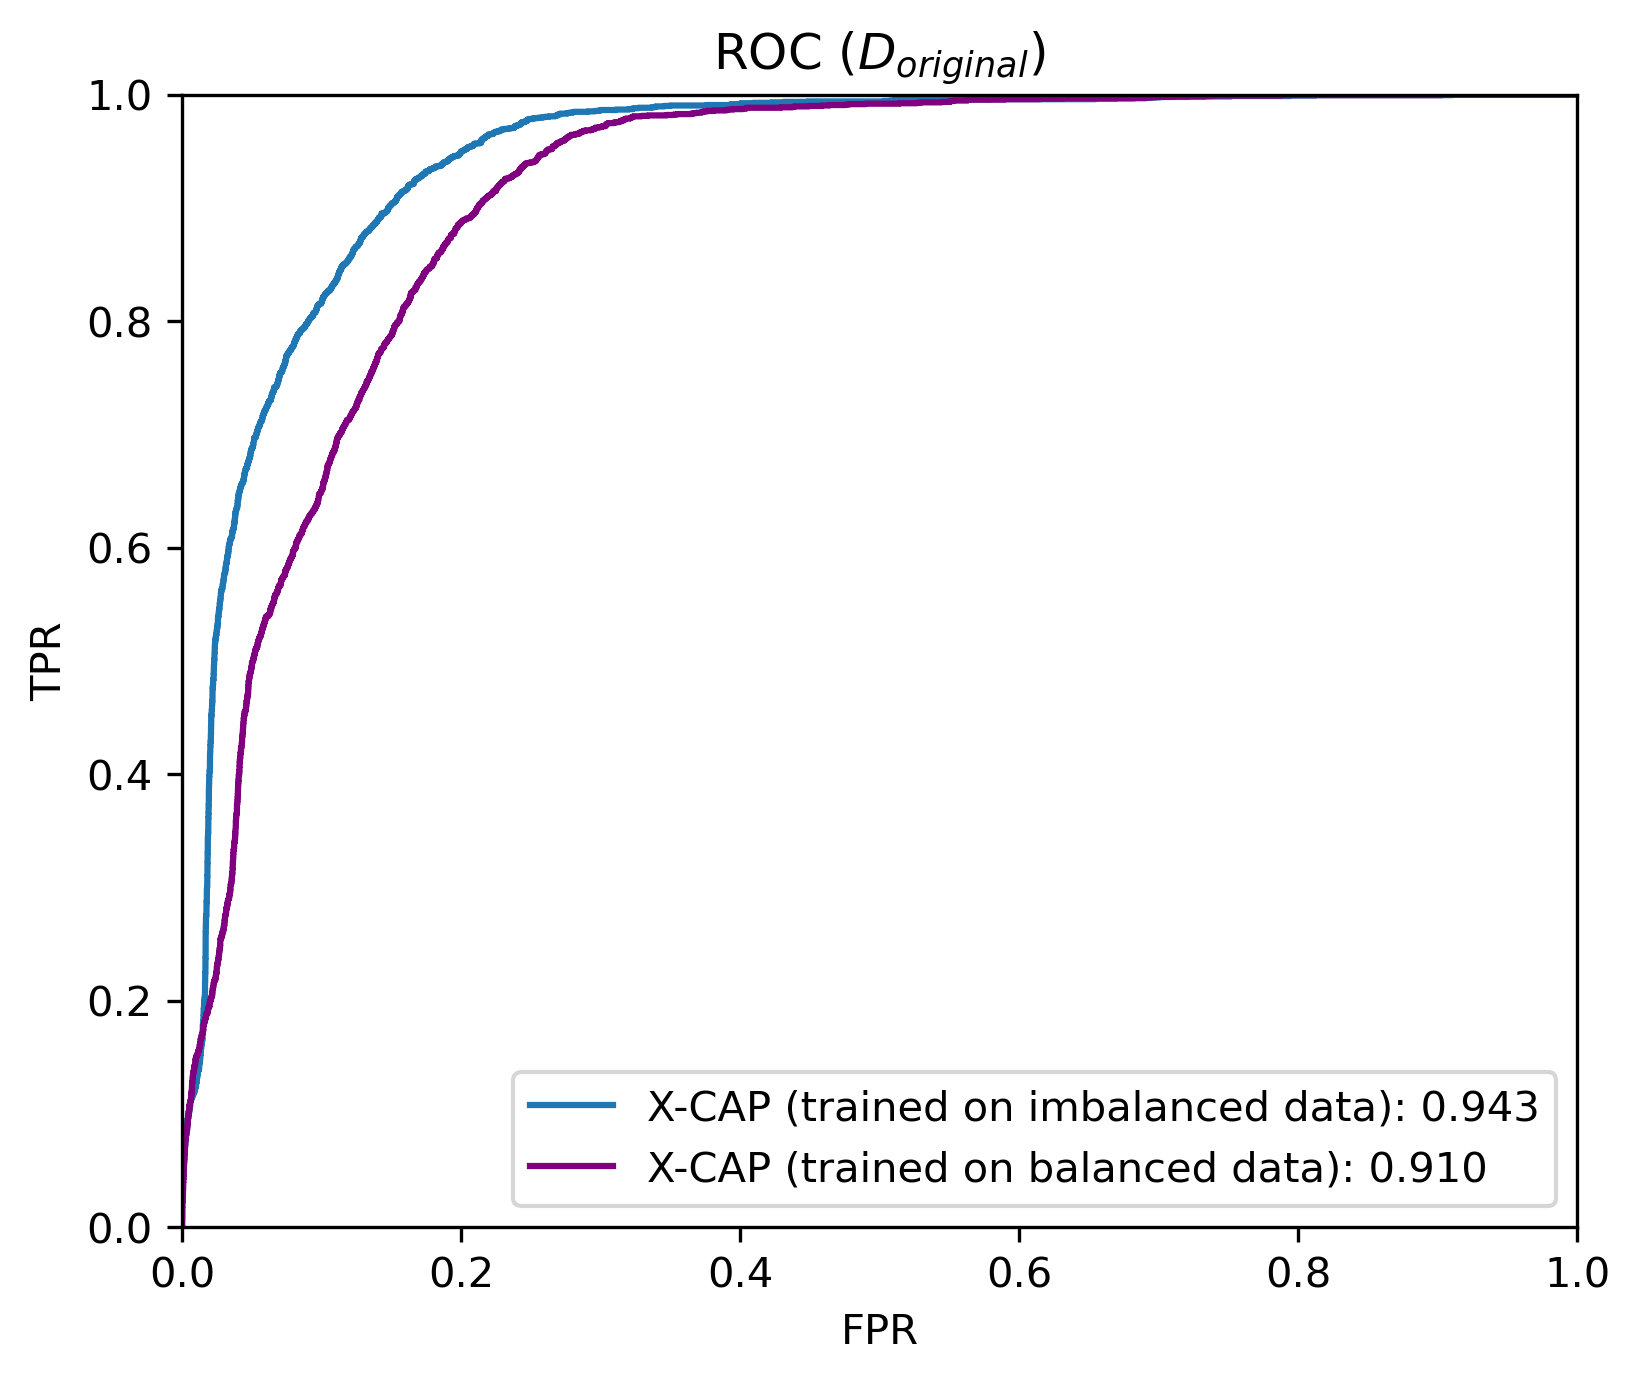

In [11]:
plotRoc()

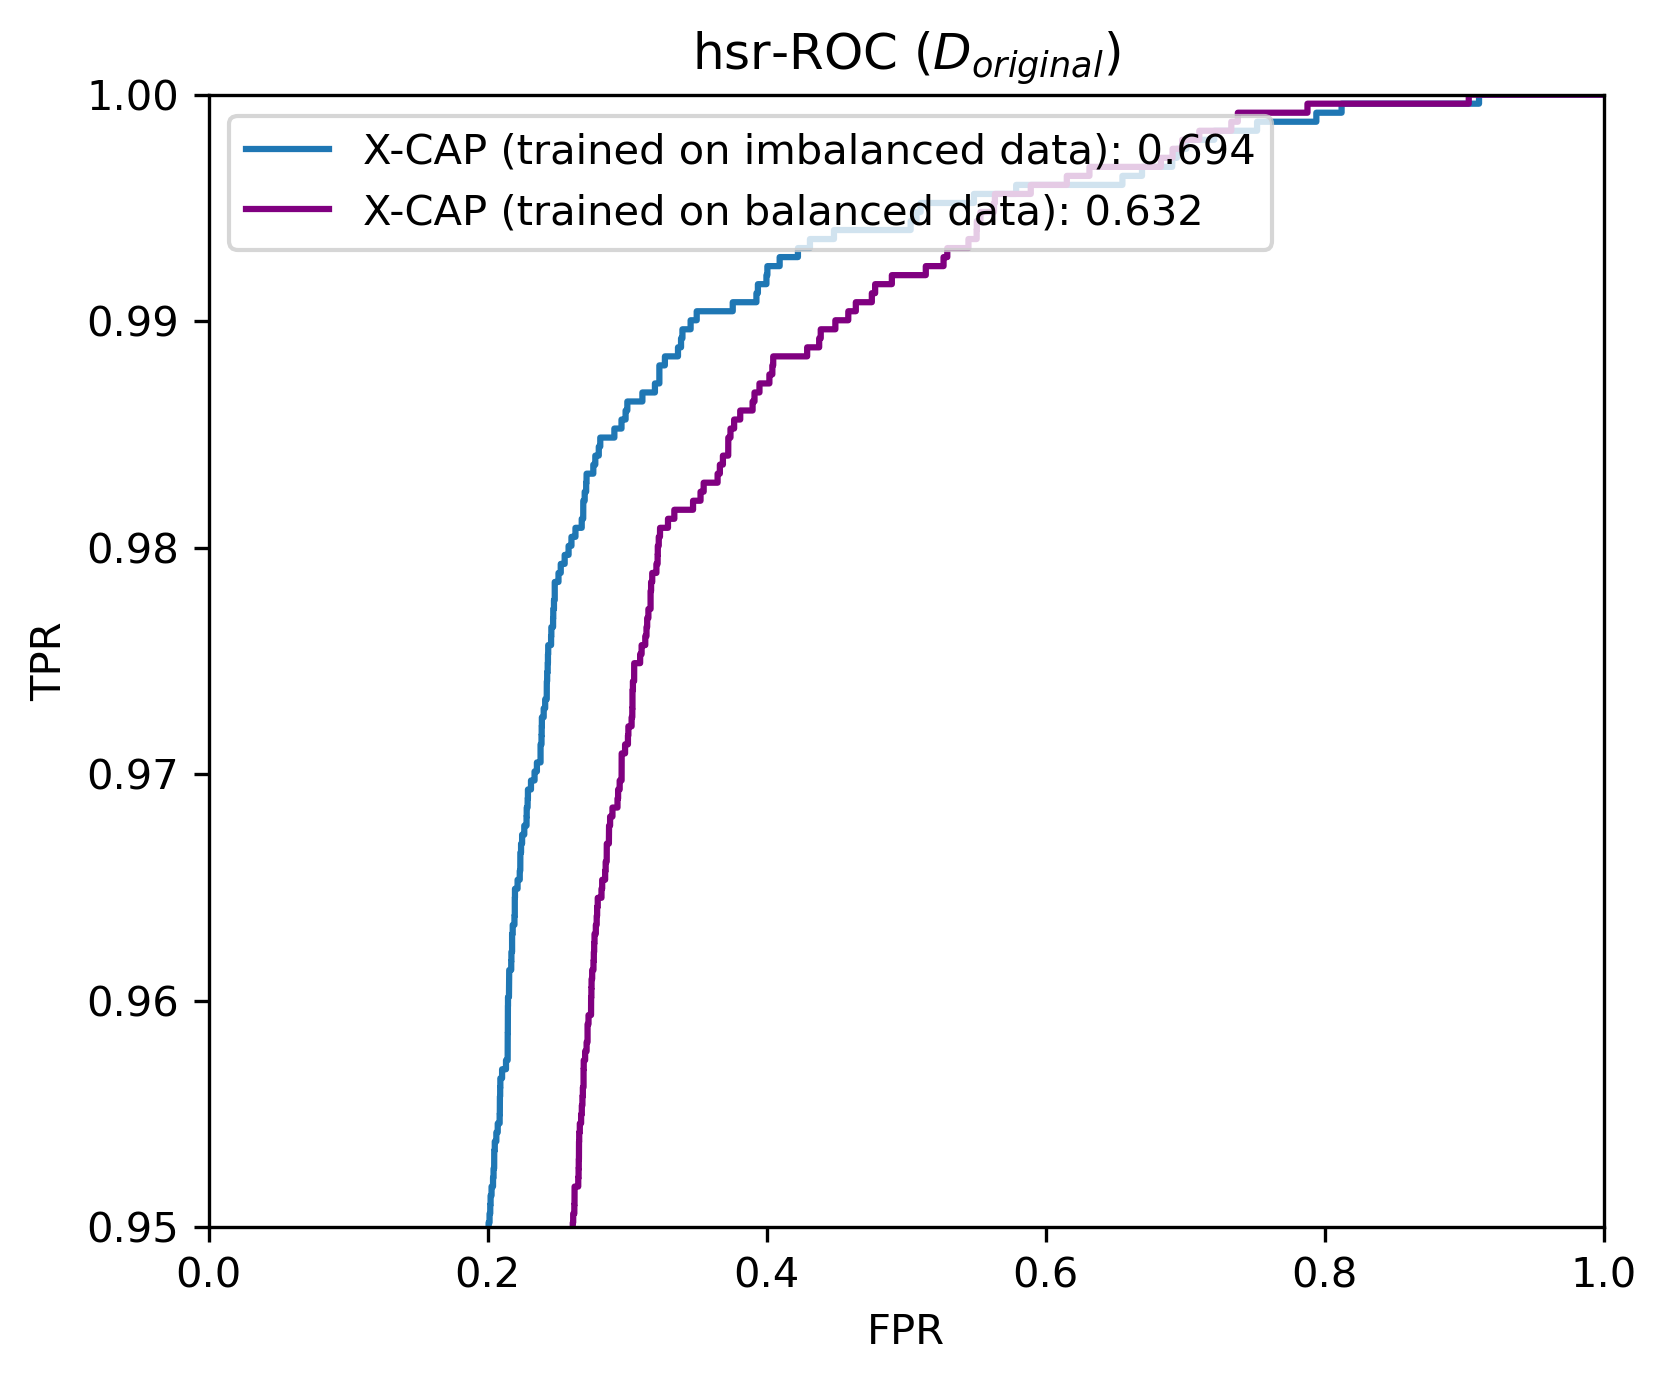

In [15]:
plotRoc(hsr=True)

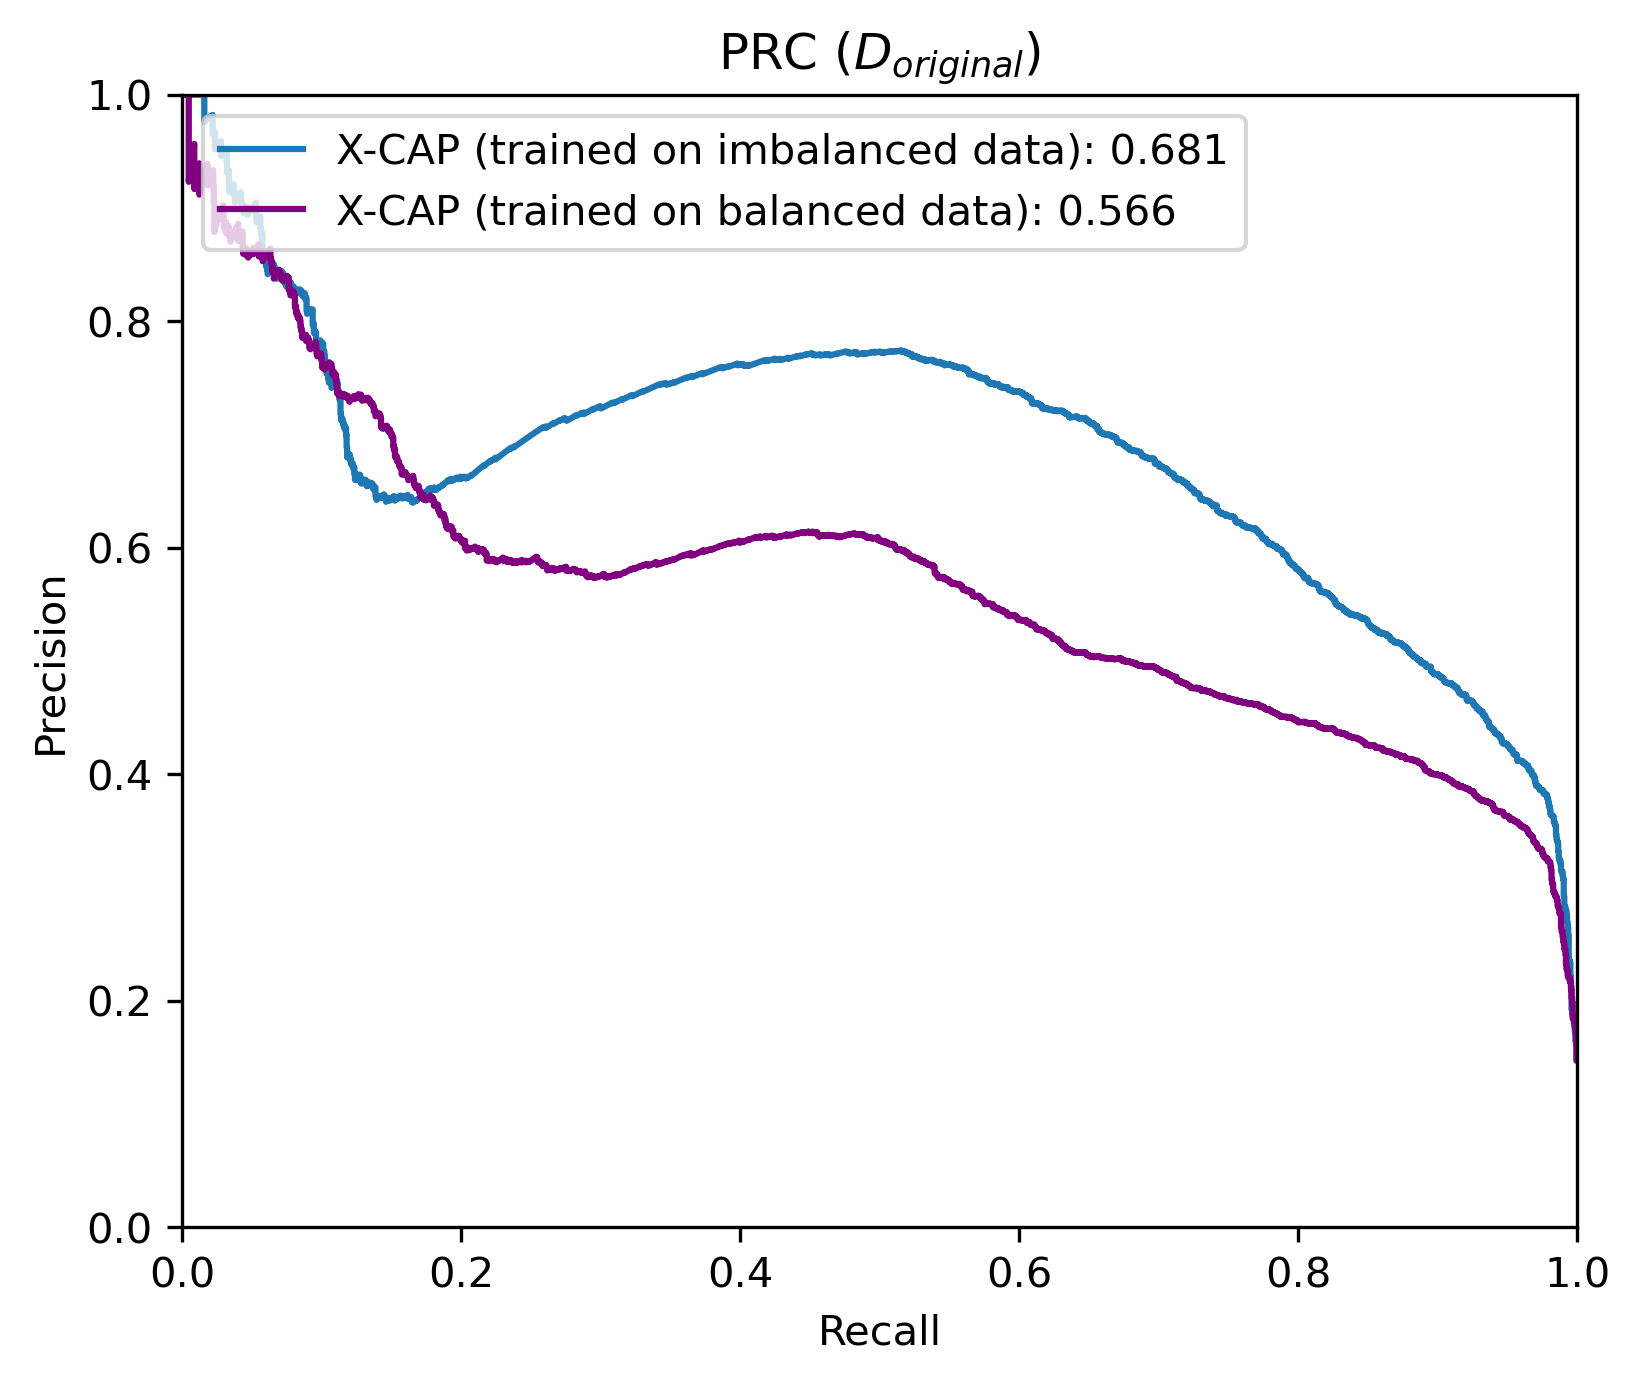

In [14]:
plotPrc()